In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tf.keras.losses import sparse_categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50, MobileNet
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import pandas as pd
import shutil
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [2]:
img_height, img_width = 128, 128
batch_size = 12
train_data_dir = "Dataset2/"
test_data_dir = "Test/"

# Create test directory and move 10% of the data to this directory
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        test_class_dir = os.path.join(test_data_dir, class_name)
        os.makedirs(test_class_dir)
        files = os.listdir(class_dir)
        n_test = int(len(files) * 0.1)
        test_files = files[:n_test]
        for test_file in test_files:
            src = os.path.join(class_dir, test_file)
            dst = os.path.join(test_class_dir, test_file)
            shutil.move(src, dst)

# Create data generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                
                                                ) 

Found 13333 images belonging to 4 classes.
Found 5711 images belonging to 4 classes.
Found 2114 images belonging to 4 classes.


In [3]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(img_height,img_width,3), kernel_size=(11,11),
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))



In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 30, 30, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_generator,
          epochs=15,
        validation_data=valid_generator)
model.save("demo1/alexnet.h5")

Epoch 1/15
1112/1112 [==============================] - 1339s 1s/step - loss: 1.1420 - accuracy: 0.5641 - val_loss: 1.7108 - val_accuracy: 0.5757
Epoch 2/15
1112/1112 [==============================] - 1005s 904ms/step - loss: 0.8882 - accuracy: 0.6409 - val_loss: 1.0058 - val_accuracy: 0.6671
Epoch 3/15
1112/1112 [==============================] - 953s 857ms/step - loss: 0.8335 - accuracy: 0.6584 - val_loss: 1.0937 - val_accuracy: 0.6505
Epoch 4/15
1112/1112 [==============================] - 926s 833ms/step - loss: 0.7872 - accuracy: 0.6867 - val_loss: 2.9993 - val_accuracy: 0.5144
Epoch 5/15
1112/1112 [==============================] - 896s 805ms/step - loss: 0.7625 - accuracy: 0.6997 - val_loss: 1.0580 - val_accuracy: 0.5953
Epoch 6/15
1112/1112 [==============================] - 1038s 934ms/step - loss: 0.7385 - accuracy: 0.7099 - val_loss: 0.8064 - val_accuracy: 0.7428
Epoch 7/15
1112/1112 [==============================] - 993s 893ms/step - loss: 0.7082 - accuracy: 0.7273 - val_

In [28]:

modelAccuracy = model.evaluate(test_generator, verbose=0)
print('Test Accuracy is {}%'.format(modelAccuracy[1] * 100))
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

Test Accuracy is 64.7587537765503%


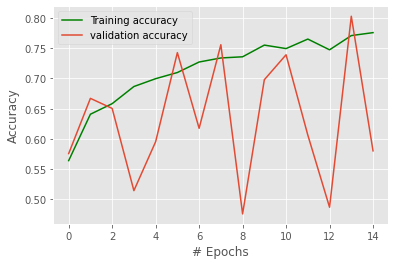

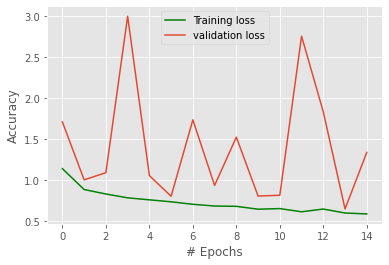

0.7758944034576416


In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/alex_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/alex_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)


In [18]:
class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
y_pred = model.predict(test_generator)
print(class_names[np.argmax(y_pred[1])])

Normal


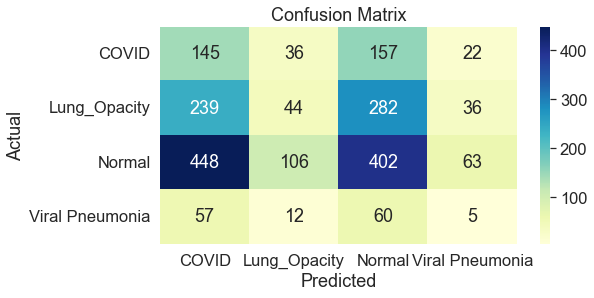

In [10]:
y_pred = model.predict(test_generator) # predict on test_generator

y_pred_classes = np.argmax(y_pred, axis=1) # obtain predicted class labels

conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)

class_names = list(test_generator.class_indices.keys())

conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

plt.figure(figsize=(8,4))
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()








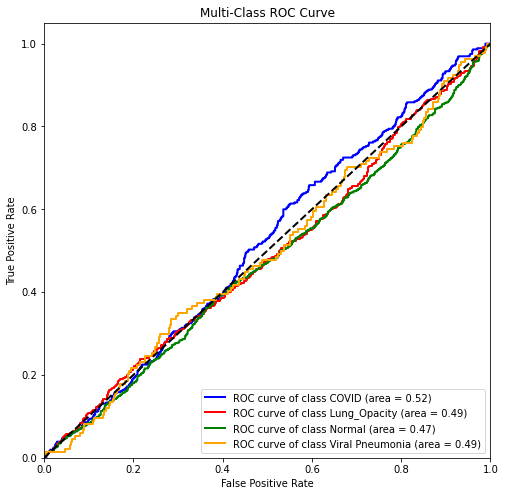

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import keras

# Load the saved model
model = keras.models.load_model('demo1/alexnet.h5')

class_names = list(test_generator.class_indices.keys())
# Make predictions on the test data
y_pred_proba = model.predict(test_generator)

# Calculate the AUC for each class
lb = LabelBinarizer()
lb.fit(test_generator.classes)
y_true = lb.transform(test_generator.classes)
aucs = []
for i in range(test_generator.num_classes):
    auc = roc_auc_score(y_true[:, i], y_pred_proba[:, i])
    aucs.append(auc)
    
# Plot the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = aucs[i]
    
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(test_generator.num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [12]:
y_pred = model.predict_generator(test_generator).argmax(axis=1)


C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from keras.callbacks import EarlyStopping

# define early stopping criteria
earlystop_callback = EarlyStopping(
    monitor='val_loss',  # monitor validation loss
    mode='min',  # minimize the validation loss
    patience=3,  # number of epochs with no improvement before stopping
    restore_best_weights=True  # restore the weights of the best epoch
)

# train the model with early stopping
history = model.fit(
    train_generator,
    epochs=50,  # maximum number of epochs
    validation_data=valid_generator,
    callbacks=[earlystop_callback]  # use early stopping callback
)


In [27]:
from sklearn.metrics import classification_report

# obtain predicted class probabilities
y_pred = model.predict(test_generator)

# obtain predicted class labels
if y_pred.ndim == 2:
    # if y_pred is 2D, take the argmax along axis 1
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    # if y_pred is 1D, convert it to a binary array of predicted labels
    y_pred_classes = np.array([1 if p >= 0.5 else 0 for p in y_pred])

# obtain true class labels
y_true = test_generator.classes

# obtain class names
class_names = list(test_generator.class_indices.keys())

# generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)

print(report)





                 precision    recall  f1-score   support

          COVID       0.19      0.47      0.27       360
   Lung_Opacity       0.35      0.11      0.17       601
         Normal       0.49      0.43      0.46      1019
Viral Pneumonia       0.12      0.11      0.12       134

       accuracy                           0.33      2114
      macro avg       0.29      0.28      0.26      2114
   weighted avg       0.38      0.33      0.32      2114



In [24]:
# Get the true labels
y_true = test_generator.classes

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Precision: 0.348
Recall: 0.312
F1-score: 0.306
